<a href="https://colab.research.google.com/github/henryonomakpo/The-Impact-of-ESG-Ratings-on-EV-Manufacturing-Industry/blob/main/Metaverse_Crypto_Tokens_Forecasting_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# Import libraries and load the dataset

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, mean_squared_error

from IPython.core.display import display, HTML

from datetime import datetime
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN
from tensorflow.keras.optimizers import Adam
import matplotlib_inline

df = pd.read_csv('/content/MetaCoin.csv')
df.head()

,Date,Close_AdShares,Close_1BOX,Close_7Pixels,Close_9D_NFT,Close_Adroverse
0,11/9/17,0.144135,NaN,NaN,NaN,NaN
1,11/10/17,0.123451,NaN,NaN,NaN,NaN
2,11/11/17,0.137127,NaN,NaN,NaN,NaN
3,11/12/17,0.122526,NaN,NaN,NaN,NaN
4,11/13/17,0.121987,NaN,NaN,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1705 non-null   object 
 1   Close_AdShares   1705 non-null   float64
 2   Close_1BOX       242 non-null    float64
 3   Close_7Pixels    14 non-null     float64
 4   Close_9D_NFT     239 non-null    float64
 5   Close_Adroverse  109 non-null    float64
dtypes: float64(5), object(1)
memory usage: 80.0+ KB


In [36]:
df.describe()

,Close_AdShares,Close_1BOX,Close_7Pixels,Close_9D_NFT,Close_Adroverse
count,1705.000000,242.000000,14.000000,239.000000,109.000000
mean,0.628078,0.021324,5.611743,0.146490,0.016518
std,1.093721,0.025964,0.092265,0.159597,0.011727
min,0.008818,0.004591,5.558775,0.016956,0.004127
25%,0.044586,0.006196,5.559657,0.025079,0.007250
50%,0.110972,0.009868,5.561840,0.048118,0.012568
75%,0.467954,0.024546,5.640191,0.279350,0.029056
max,5.633890,0.157250,5.882521,0.588311,0.048108


## Exploring for NULL values and dataset's dimensionality

In [48]:
# Checking for null values or missing values

df.isnull().values.any()



True

In [38]:
# Detect columns with missing values

df.columns[df.isnull().any()]

Index(['Close_1BOX', 'Close_7Pixels', 'Close_9D_NFT', 'Close_Adroverse'], dtype='object')

In [49]:
# Dealing with missing values using mean imputation

df['Close_1BOX'] = df['Close_1BOX'].fillna(df['Close_1BOX'].mean())
df['Close_7Pixels'] = df['Close_7Pixels'].fillna(df['Close_7Pixels'].mean())
df['Close_9D_NFT'] = df['Close_9D_NFT'].fillna(df['Close_9D_NFT'].mean())
df['Close_Adroverse'] = df['Close_Adroverse'].fillna(df['Close_Adroverse'].mean())

In [50]:
df.isna().sum()

Date               0
Close_AdShares     0
Close_1BOX         0
Close_7Pixels      0
Close_9D_NFT       0
Close_Adroverse    0
dtype: int64

In [51]:
df.shape

(1705, 6)

In [52]:
for i in df.columns[1:5]:
    fig = px.line(df, y=i, x=df.columns[0])
    fig.show()

### Converting dates and extracting months and years

In [53]:
def convert_date(x):
    date = datetime.strptime(x, "%Y-%m-%d")
    return [date.month, date.year]

In [54]:
df["Year"] = df["Date"].apply(lambda x: convert_date(x)[1])
df["Month"] = df["Date"].apply(lambda x: convert_date(x)[0])

ValueError: time data '11/9/17' does not match format '%Y-%m-%d'

In [55]:

# Function to convert date string to year and month
def convert_date(date_string):
    date_parts = date_string.split('/')
    month = int(date_parts[0])
    year = 2000 + int(date_parts[2])  # Assuming the year is in the format YY
    return month, year

# Load the dataset
#df = pd.read_csv('your_dataset.csv')

# Convert the date column to year and month
df["Year"] = df["Date"].apply(lambda x: convert_date(x)[1])
df["Month"] = df["Date"].apply(lambda x: convert_date(x)[0])

# Display the updated dataframe
print(df)

          Date  Close_AdShares  Close_1BOX  Close_7Pixels  Close_9D_NFT  \
0      11/9/17        0.144135    0.021324       5.611743      0.146490   
1     11/10/17        0.123451    0.021324       5.611743      0.146490   
2     11/11/17        0.137127    0.021324       5.611743      0.146490   
3     11/12/17        0.122526    0.021324       5.611743      0.146490   
4     11/13/17        0.121987    0.021324       5.611743      0.146490   
...        ...             ...         ...            ...           ...   
1700    7/6/22        1.858648    0.004616       5.611743      0.017729   
1701    7/7/22        1.875978    0.004616       5.611743      0.146490   
1702    7/8/22        1.858953    0.004591       5.611743      0.146490   
1703    7/9/22        1.870305    0.004591       5.611743      0.146490   
1704   7/10/22        1.837070    0.021324       5.611743      0.146490   

      Close_Adroverse  Year  Month  
0            0.016518  2017     11  
1            0.016518  20

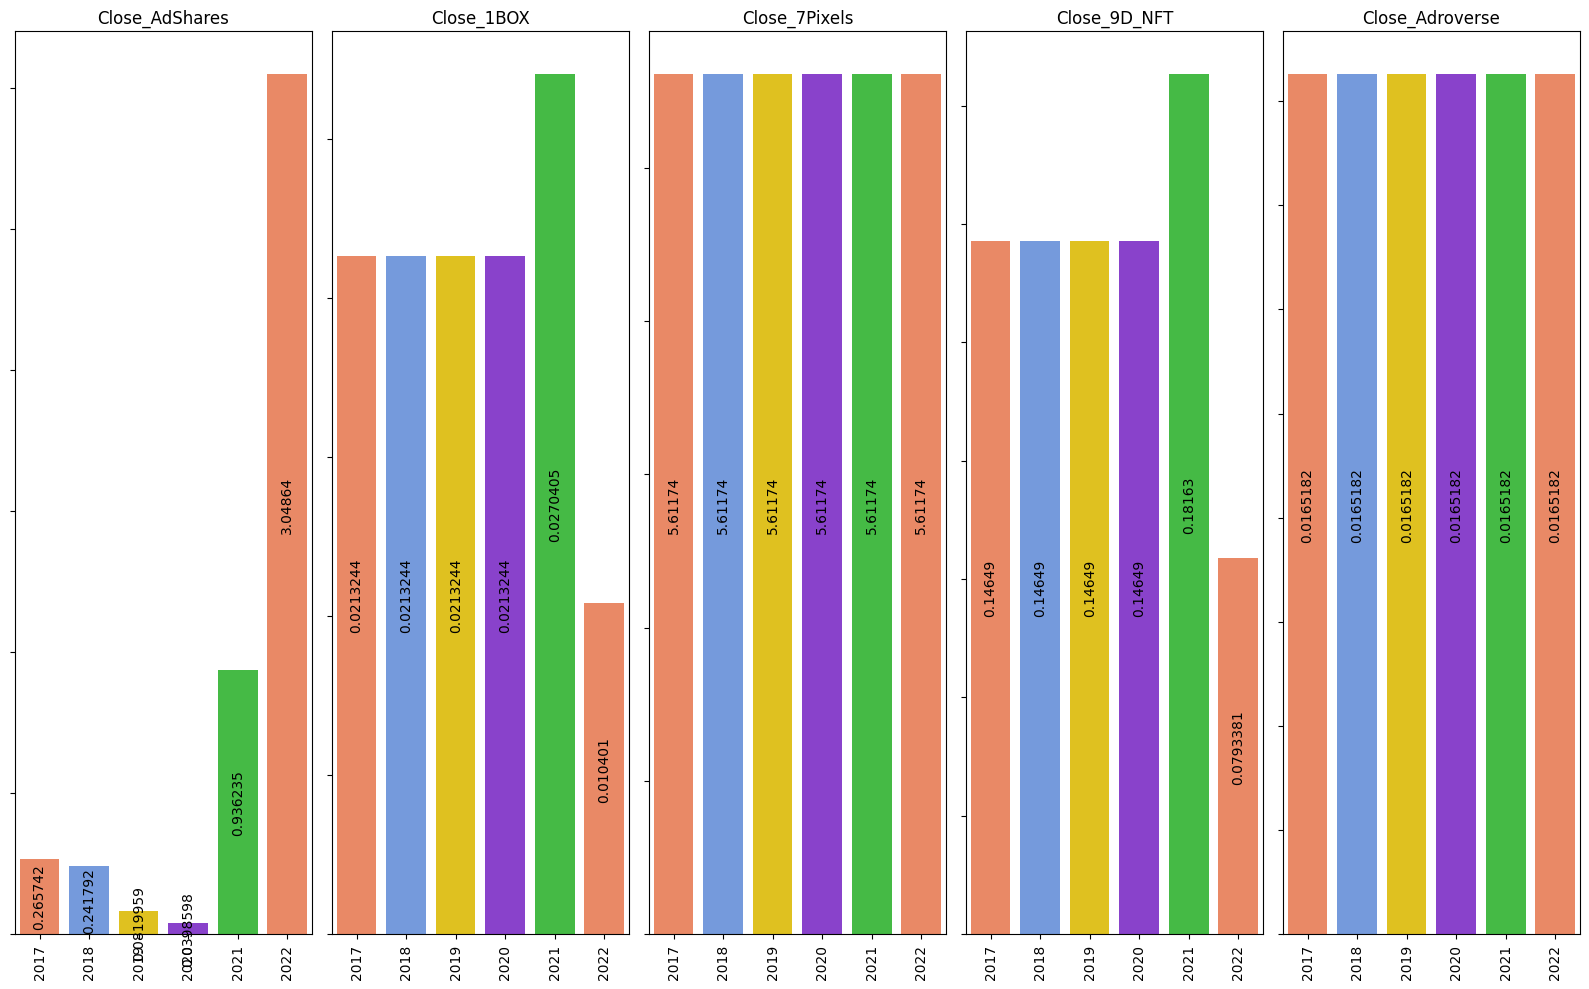

In [93]:
grouped = df.groupby("Year")

# Define a custom color palette
colors = ["#FF7F50", "#6495ED", "#FFD700", "#8A2BE2", "#32CD32"]

display(HTML("<h1>Stock prices of Metaverse Crypto Tokens</h1>"))
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 10))
for i, j in enumerate(df.columns[1:6]):
    mean = pd.DataFrame(grouped[j].mean())
    sns.barplot(x=mean.index[:25], y=mean.iloc[:25, 0], ax=axes[i], palette=colors)
    for container in axes[i].containers:
        axes[i].bar_label(container, rotation=90, label_type="center")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_yticklabels(())
    axes[i].set_title(j)
plt.tight_layout()
plt.show()


## Extracting data for further data preparation and forecasting training

In [68]:
nums = df.columns[1:6].tolist()
print("Training features needed for forecasting training and further data preparation: {}".format(", ".join(nums)))

Training features needed for forecasting training and further data preparation: Close_AdShares, Close_1BOX, Close_7Pixels, Close_9D_NFT, Close_Adroverse


In [69]:
data = df[nums].copy()

In [70]:
cols = data.columns

for i in cols:
    dname = "Target "+i
    data[dname] = data[i].shift(-1)

In [71]:
# Drop missing values

data.dropna(inplace=True)

## Scaling the values in the dataset variable

In [72]:
sc = MinMaxScaler()
scaled = sc.fit_transform(data.values)

In [74]:
x = []

backcandles = 1
for j in range(4):
    x.append([])
    for i in range(backcandles, scaled.shape[0]):
        x[j].append(scaled[i-backcandles:i, j])

x = np.moveaxis(x, [0], [2])

x, yi = np.array(x), np.array(scaled[backcandles:, -4:])
y = np.reshape(yi, (len(yi), 4))

## Split the Dataset into Training and Testing

In [75]:
split = int(len(x)*0.8)

x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

## ANN for forecasting Meta Coin

In [76]:
lstm_input = tf.keras.layers.Input(shape=(backcandles, 4), name="lstm_input")
inputs = tf.keras.layers.LSTM(150, name="first_layer")(lstm_input)
inputs = tf.keras.layers.Dense(4, name="dense_layer", activation="linear")(inputs)
model = tf.keras.models.Model(inputs=lstm_input, outputs=inputs)
adam = tf.keras.optimizers.Adam()
model.compile(optimizer=adam, loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 1, 4)]            0         
                                                                 
 first_layer (LSTM)          (None, 150)               93000     
                                                                 
 dense_layer (Dense)         (None, 4)                 604       
                                                                 
Total params: 93604 (365.64 KB)
Trainable params: 93604 (365.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### ANN Training model

In [78]:
history = model.fit(x=x_train, y=y_train, batch_size=16, epochs=20, validation_split=0.1)

Epoch 1/20
77/77 [==============================] - 5s 13ms/step - loss: 0.0082 - val_loss: 4.5352e-05
Epoch 2/20
77/77 [==============================] - 0s 5ms/step - loss: 1.0411e-05 - val_loss: 2.3731e-05
Epoch 3/20
77/77 [==============================] - 0s 5ms/step - loss: 5.5250e-06 - val_loss: 1.2619e-05
Epoch 4/20
77/77 [==============================] - 0s 5ms/step - loss: 3.2517e-06 - val_loss: 8.3895e-06
Epoch 5/20
77/77 [==============================] - 0s 5ms/step - loss: 1.7059e-06 - val_loss: 3.9074e-06
Epoch 6/20
77/77 [==============================] - 0s 5ms/step - loss: 8.4778e-07 - val_loss: 2.1860e-06
Epoch 7/20
77/77 [==============================] - 1s 9ms/step - loss: 3.9493e-07 - val_loss: 8.8850e-07
Epoch 8/20
77/77 [==============================] - 1s 9ms/step - loss: 1.8474e-07 - val_loss: 4.0625e-07
Epoch 9/20
77/77 [==============================] - 0s 5ms/step - loss: 7.6626e-08 - val_loss: 1.8058e-07
Epoch 10/20
77/77 [==============================

## ANN Training performance log history

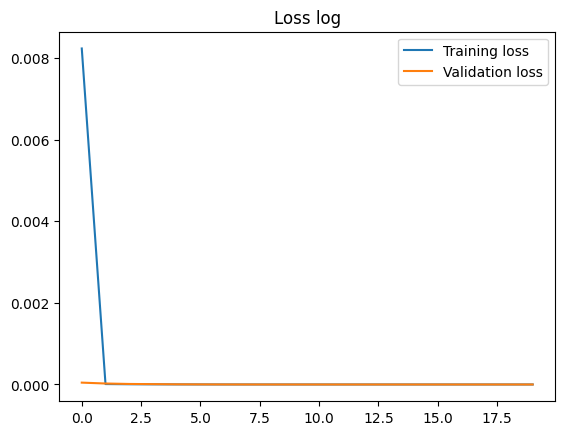

In [79]:
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.legend()
plt.title("Loss log")
plt.show()

## ANN Predicting the test values of Meta Coin Stock

In [80]:
y_pred = model.predict(x_test)

11/11 [==============================] - 0s 3ms/step


## ANN Meta Coin Stock Evaluation metrics

In [81]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("The MSE is : ", mse)
print("The R-Squared is : ", r2)

The MSE is :  0.02019314441509722
The R-Squared is :  -0.14128324071235196


## ANN Visual Comparism of Meta Coin Stock Performance

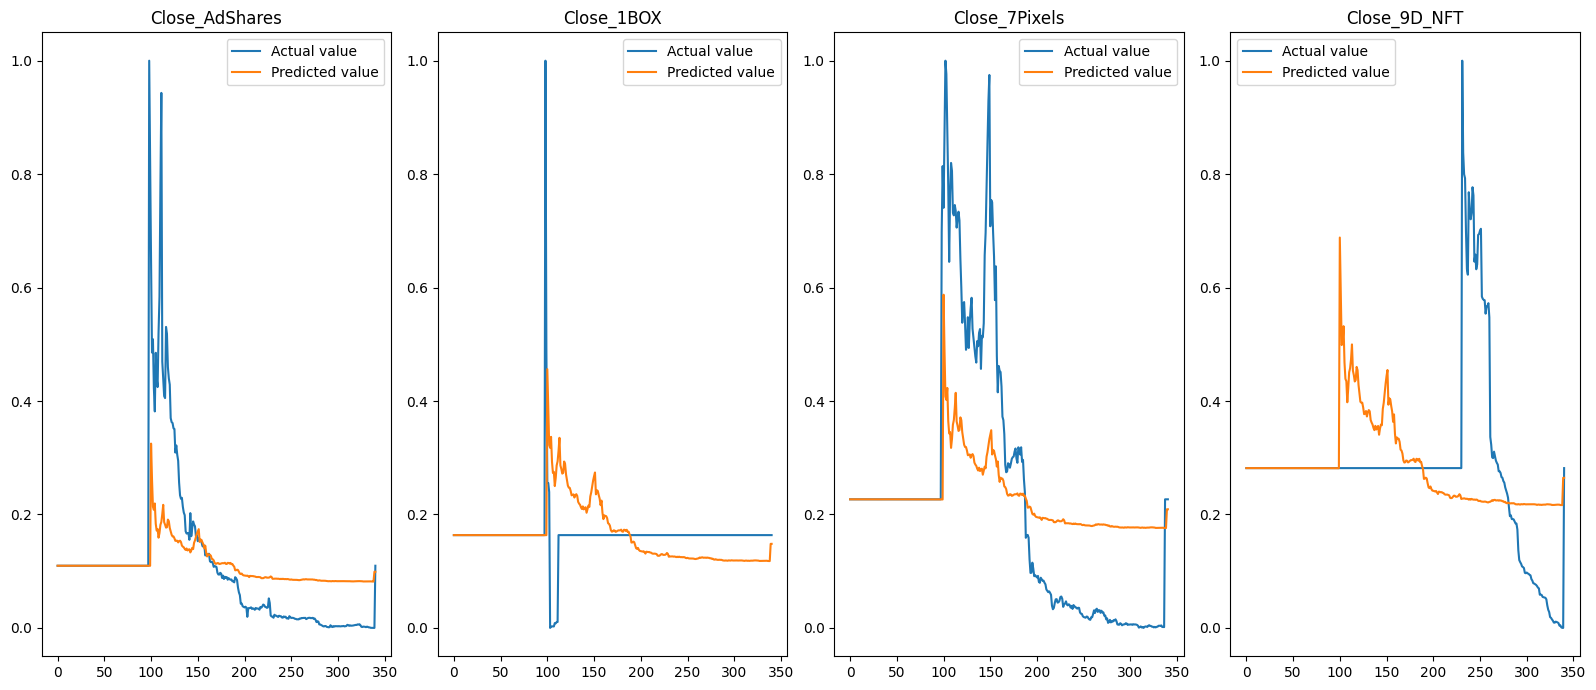

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 7))
for i in range(4):
    axes[i].plot(y_test[:, i], label="Actual value")
    axes[i].plot(y_pred[:, i], label="Predicted value")
    axes[i].legend()
    axes[i].set_title(nums[i])
plt.tight_layout()
plt.show()

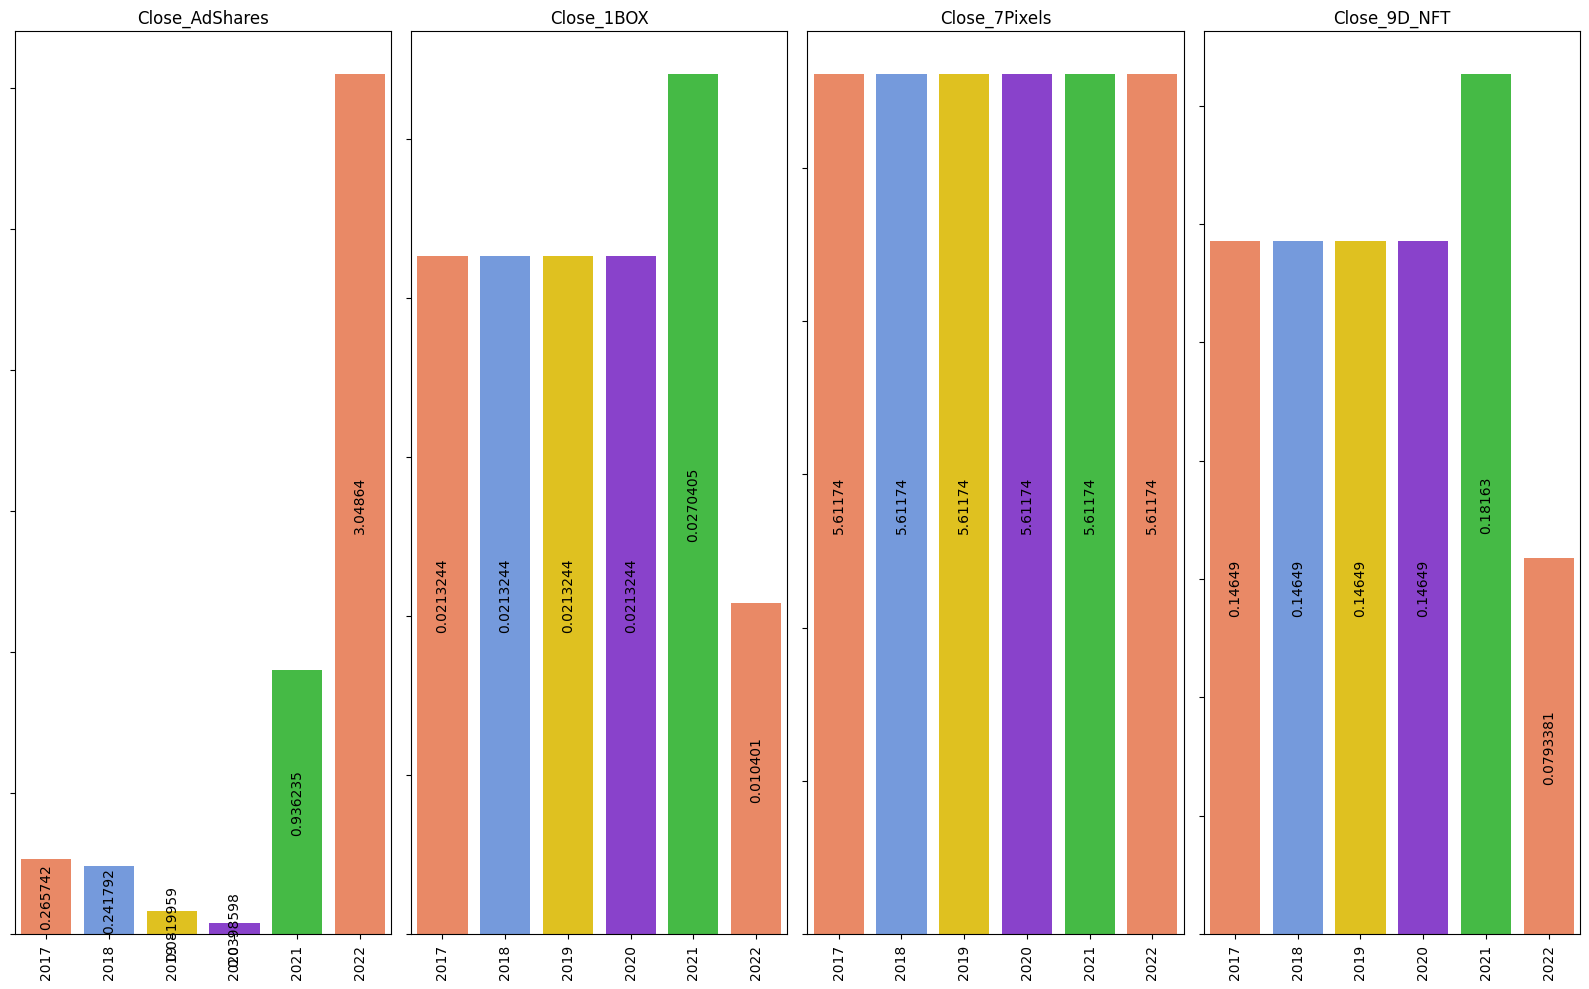

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Group the dataframe by "Year"
grouped = df.groupby("Year")

# Define a custom color palette
colors = ["#FF7F50", "#6495ED", "#FFD700", "#8A2BE2", "#32CD32"]

# Display header for the first set of plots
display(HTML("<h1>Stock prices of Metaverse Crypto Tokens</h1>"))

# Create subplots for the first set of plots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 10))

# Plot each column in the first set of plots
for i, j in enumerate(df.columns[1:5]):
    mean = pd.DataFrame(grouped[j].mean())
    sns.barplot(x=mean.index[:20], y=mean.iloc[:20, 0], ax=axes[i], palette=colors)
    for container in axes[i].containers:
        axes[i].bar_label(container, rotation=90, label_type="center")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_yticklabels(())
    axes[i].set_title(j)

# Adjust the layout and display the first set of plots
plt.tight_layout()
plt.show()



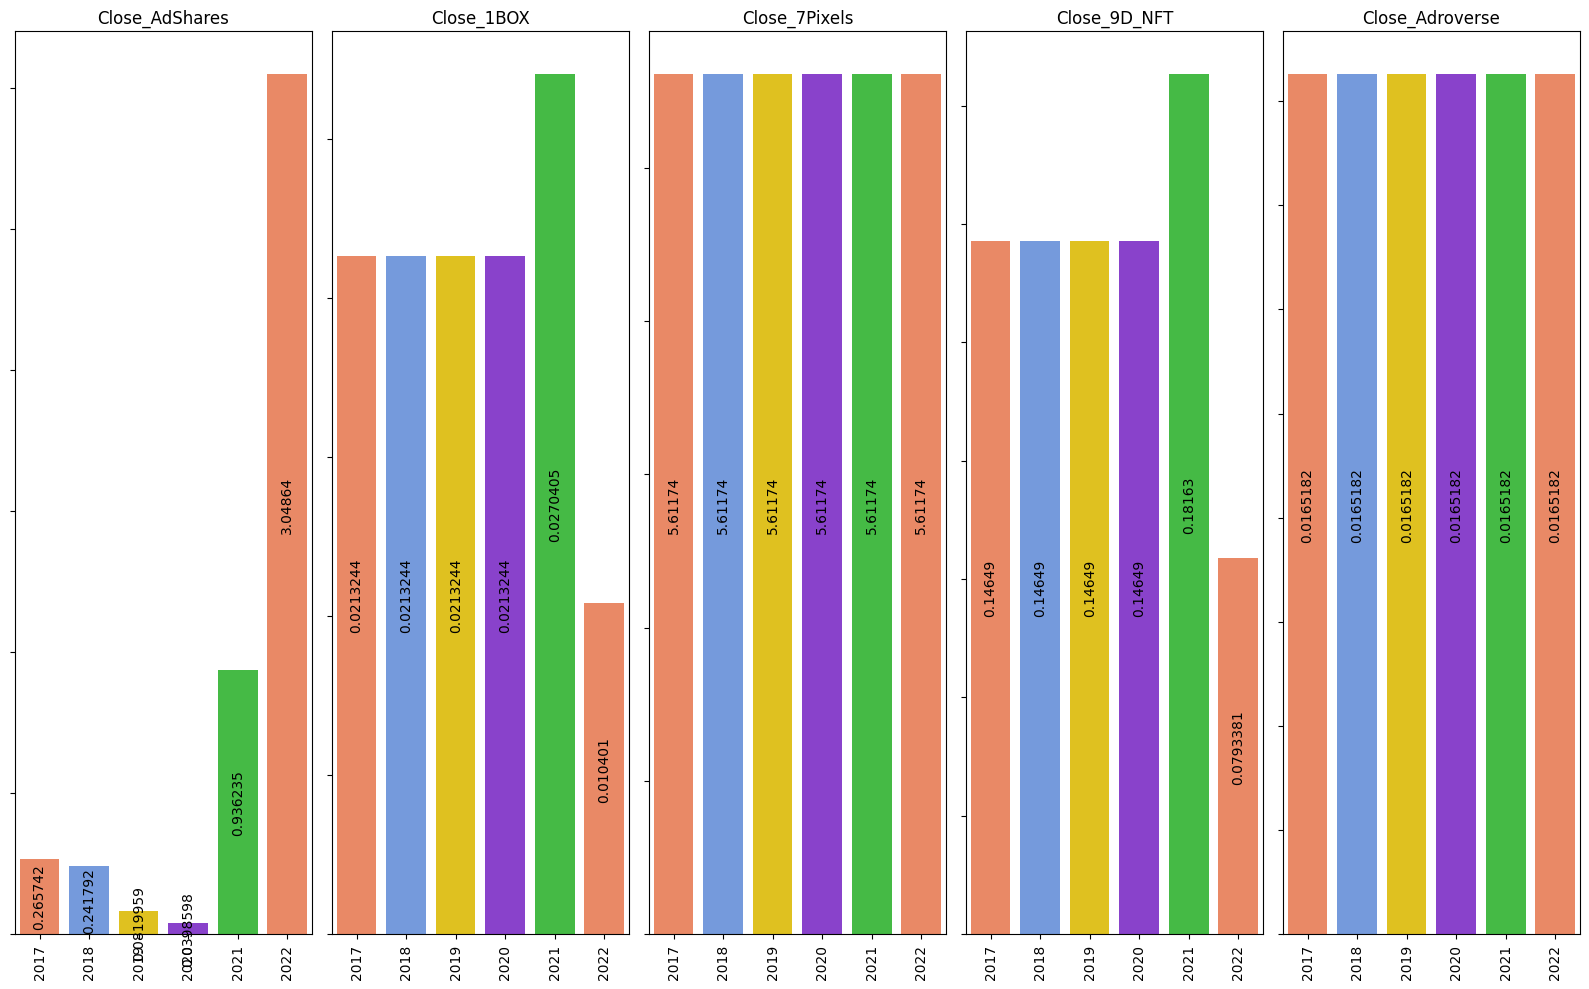

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Group the dataframe by "Year"
grouped = df.groupby("Year")

# Define a custom color palette
colors = ["#FF7F50", "#6495ED", "#FFD700", "#8A2BE2", "#32CD32"]

# Display header for the first set of plots
display(HTML("<h1>Stock prices of Metaverse Crypto Tokens</h1>"))

# Create subplots for the first set of plots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 10))

# Plot each column in the first set of plots
for i, j in enumerate(df.columns[1:6]):
    mean = pd.DataFrame(grouped[j].mean())
    sns.barplot(x=mean.index[:25], y=mean.iloc[:25, 0], ax=axes[i], palette=colors)  # Set the custom color palette
    for container in axes[i].containers:
        axes[i].bar_label(container, rotation=90, label_type="center")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_yticklabels(())
    axes[i].set_title(j)

# Adjust the layout and save the first set of plots
plt.tight_layout()
plt.savefig("late_20th_century_plots.png")